# Image Generation Exercise

## GOAL: Given a list of ingredients, generate a dish, a recipe, and a picture of the dish

In [48]:
# Here are your ingredients, but feel free to change them!

ingredients = ["flour", "eggs", "milk", "sugar", "butter", "salt", "onions", "garlic", "tomatoes", "cheese"]


---

### TASK: Connect to Bedrock Runtime via Boto3

In [49]:
import boto3
import json
import base64
from PIL import Image

bedrock_runtime = boto3.client(region_name='us-east-1', service_name='bedrock-runtime')

### TASK: Create a prompt that will take the ingredients list and generate a dish and recipe

In [50]:
#def create_dish_prompt(list_of_ingredients):
#    prompt = f""
#    return prompt
ingredients_string = ', '.join(ingredients)

In [51]:
dish_prompt = f"Give me a dish that I can make with these ingredients: {ingredients_string}"
dish = 'cookie'
recipe_prompt = f'Give me a recipe to make this dish: {dish}'

### TASK: Use the LLM to Generate the Dish and Recipe

In [52]:
llm_body = json.dumps({
    'inputText': dish_prompt,
    'textGenerationConfig': {'temperature': 0.5}
})

**Extract the title**

In [53]:
#import re
#def extract_title(recipe):
#    return re.findall("^.*Recipe Title: .*$", recipe, re.MULTILINE)[0].strip().split("Recipe Title: ")[1]


In [54]:
#content = pass

In [55]:
#recipe_title = extract_title(content)

### TASK: Use Titan Image Generation via Boto3 to generate an Image of the dish

In [56]:
response = bedrock_runtime.invoke_model(body=llm_body, modelId='amazon.titan-text-express-v1')

In [57]:
response_body = json.loads(response.get('body').read())

In [58]:
response_body['results'][0]['outputText']

"\nYou can make a lasagna dish with the ingredients you have listed. Here's a recipe:\n\n1. Preheat your oven to 375°F (190°C).\n2. In a bowl, mix together flour, eggs, milk, sugar, butter, salt, and garlic until well combined.\n3. In a skillet, cook onions and garlic until softened.\n4. Add tomatoes and cook until they are softened.\n5. In a separate bowl, mix together shredded cheese and grated Parmesan cheese.\n6. In a baking dish, spread a thin layer of the flour mixture"

In [59]:
#prompt = 'An HD photo of quiche Lorraine, food photography, looks delicious'
prompt = 'An HD photo of lasagna, food photography, looks delicious'

In [60]:
request_body = json.dumps({
    'taskType': 'TEXT_IMAGE',
    'textToImageParams': {'text': prompt},
    'imageGenerationConfig': {
        'numberOfImages': 1,
        'quality': 'premium',
        'height': 512,
        'width': 512
    }
})

In [61]:
response = bedrock_runtime.invoke_model(body=request_body, modelId='amazon.titan-image-generator-v1')

In [62]:
response_body = json.loads(response.get('body').read())

In [63]:
base64_image_data = base64.b64decode(response_body['images'][0])

In [64]:
with open ('my_solution_image.png', 'wb') as file:
    file.write(base64_image_data)

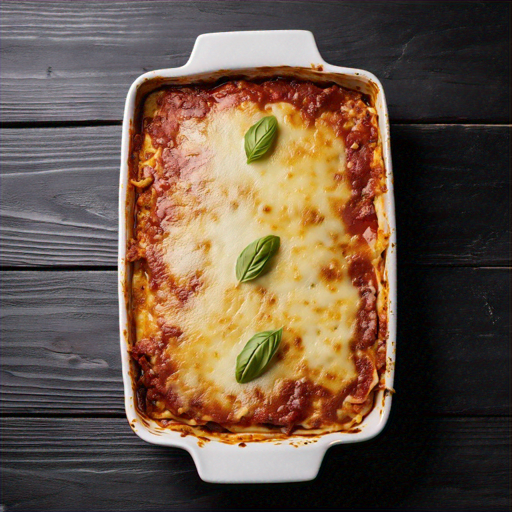

In [65]:
Image.open('my_solution_image.png')

### TASK: Use Titan Image Generation to Restyle the image to be in the style of a Watercolor Painting

In [66]:
with open('my_solution_image.png', 'rb') as f:
    content = f.read()
    image_string = base64.b64encode(content).decode('utf-8')

In [67]:
request_body_variation = json.dumps({
    'taskType': 'IMAGE_VARIATION',
    'imageVariationParams': {
        'text': 'Watercolor painting, heavy paint strokes, paper, painting',
        'images': [image_string]
    },
    'imageGenerationConfig': {
        'numberOfImages': 1,
        'quality': 'premium',
        'height': 512,
        'width': 512,
        'cfgScale': 10
    }
})

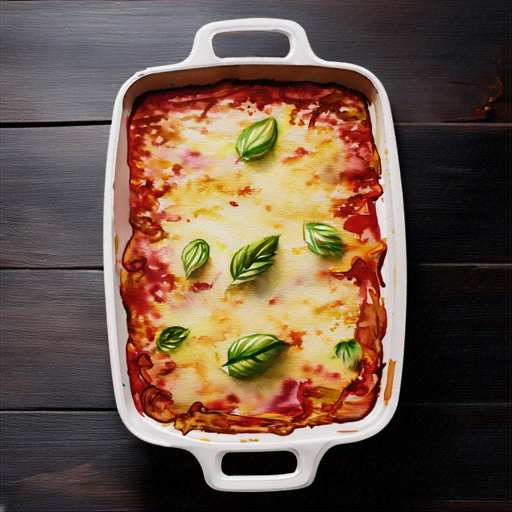

In [68]:
response = bedrock_runtime.invoke_model(body=request_body_variation, modelId='amazon.titan-image-generator-v1')

response_body = json.loads(response.get('body').read())

base64_image_data = base64.b64decode(response_body['images'][0])

with open ('watercolor_solution.png', 'wb') as file:
    file.write(base64_image_data)

Image.open('watercolor_solution.png')